<a href="https://www.kaggle.com/code/muradpitafi/cancer-diagnosis?scriptVersionId=155842026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt 


In [2]:
cancer = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cancer.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [6]:
cancer.drop(['Unnamed: 32'], axis = 1, inplace = True)

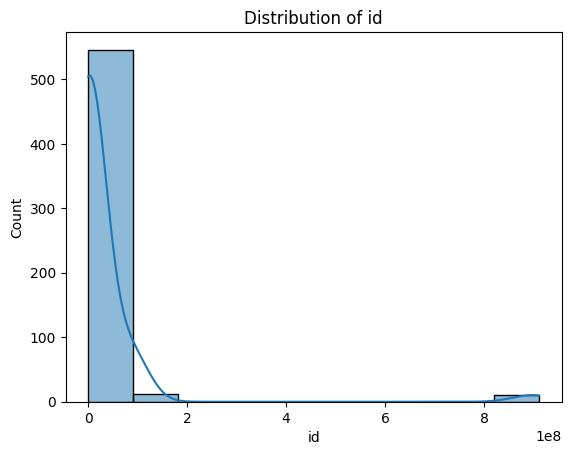

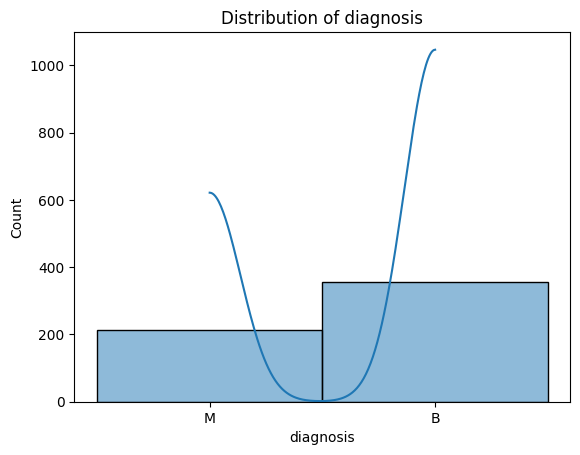

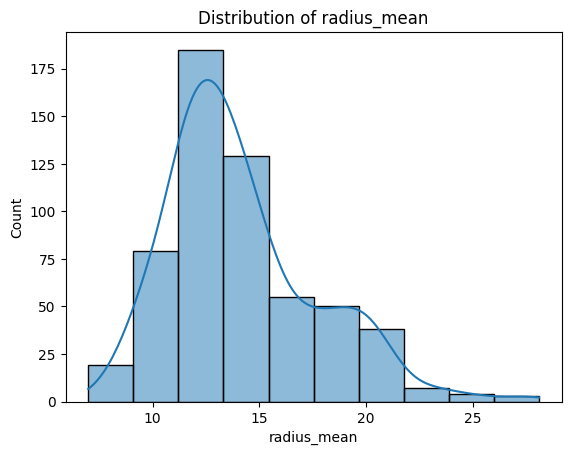

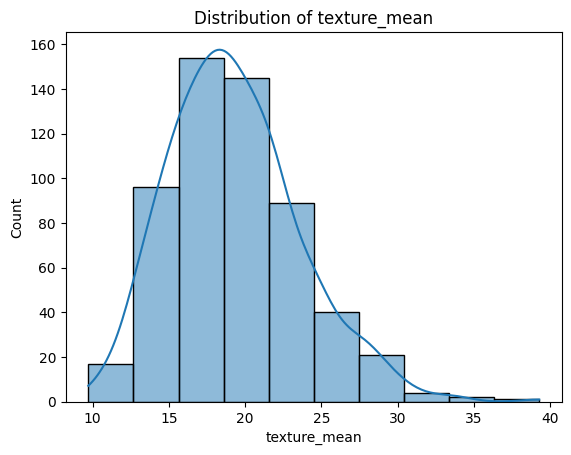

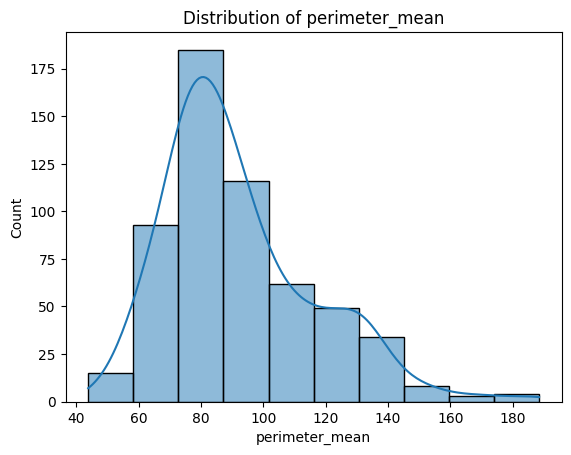

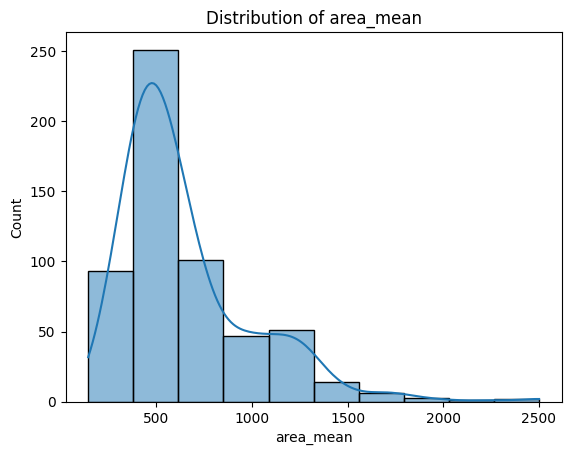

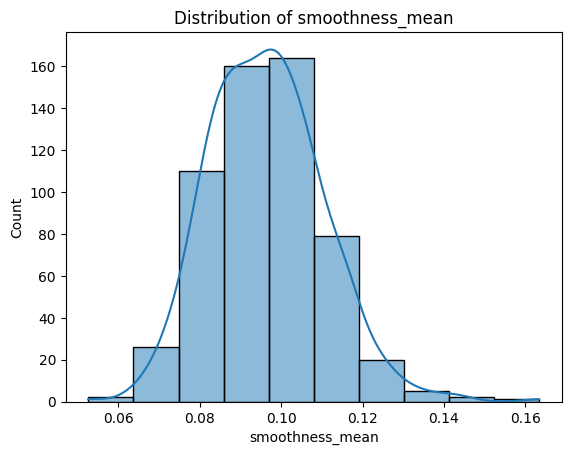

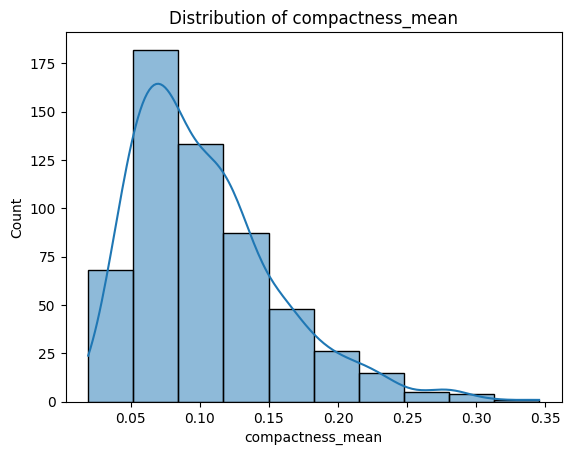

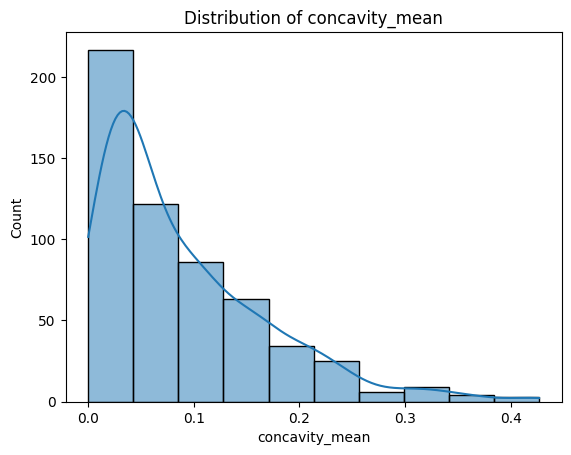

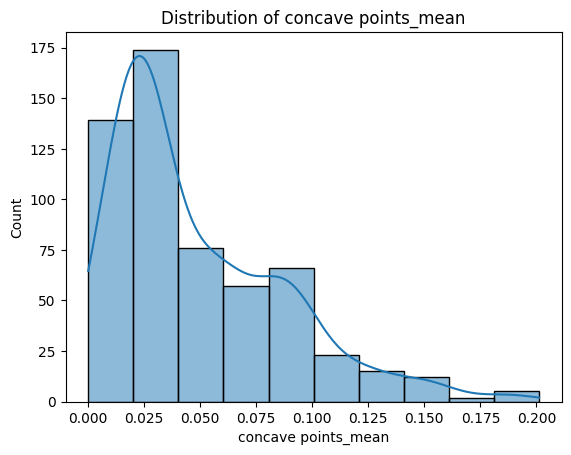

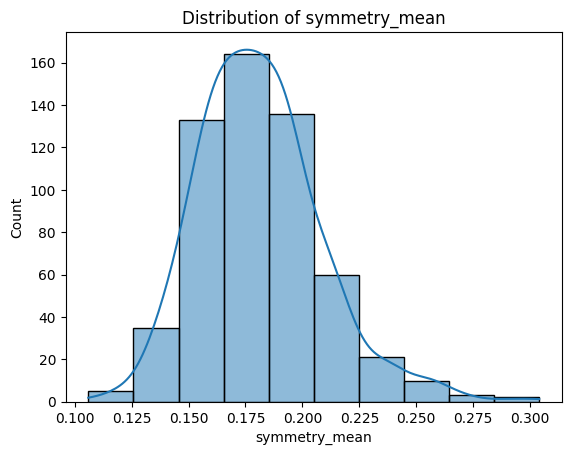

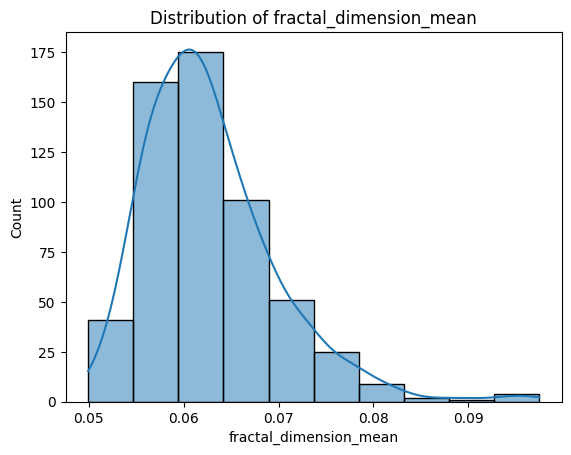

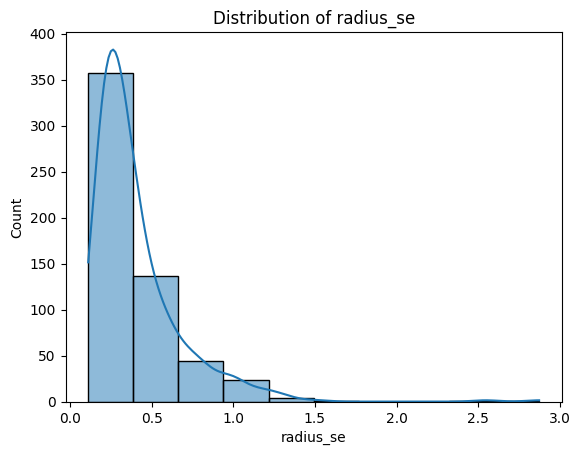

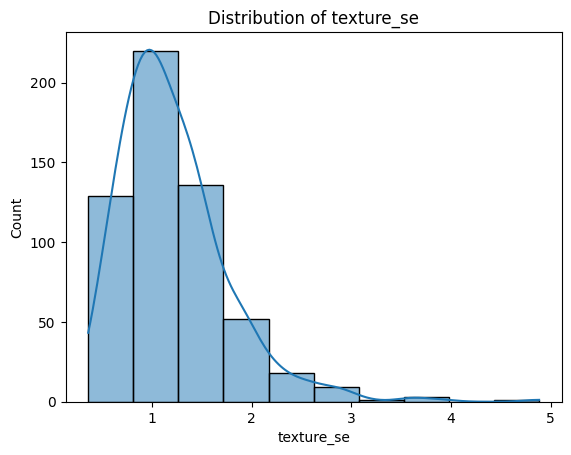

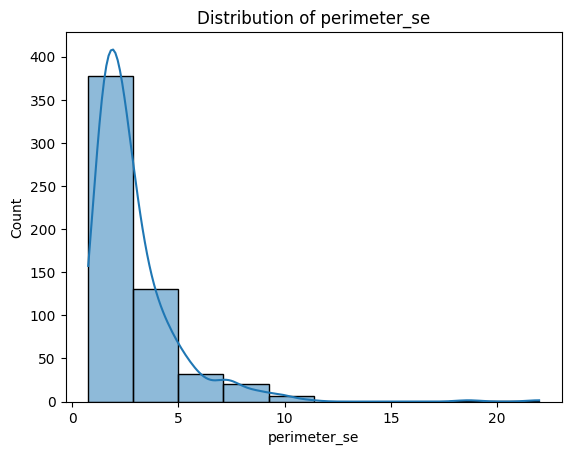

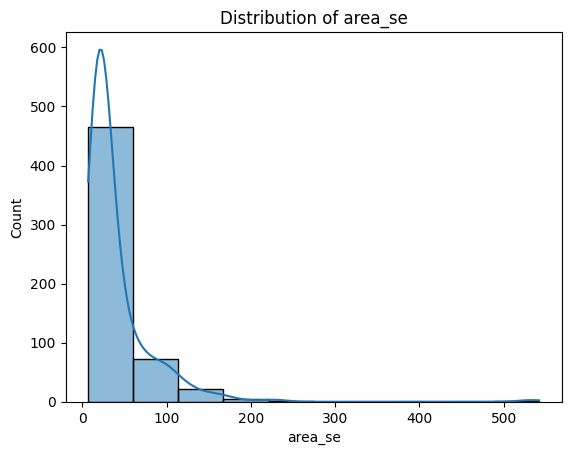

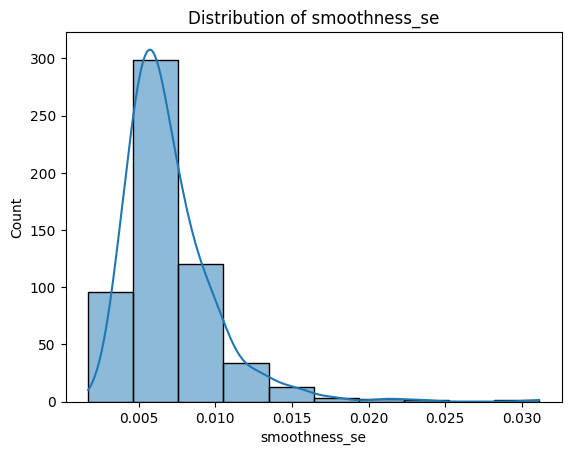

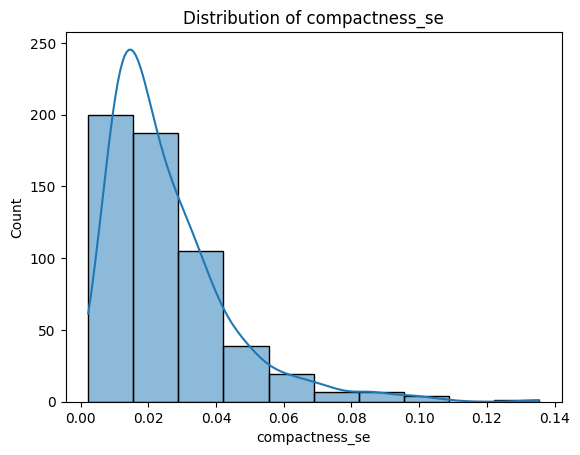

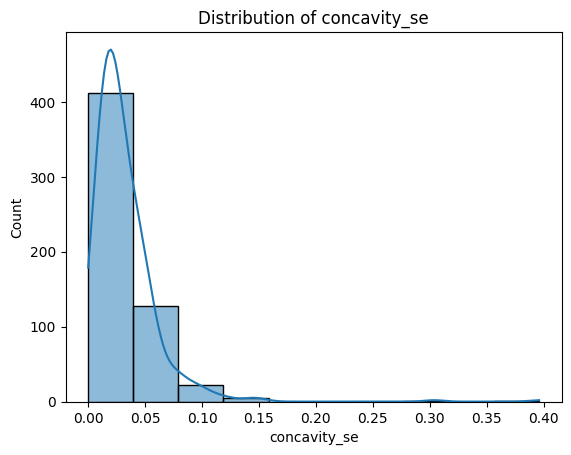

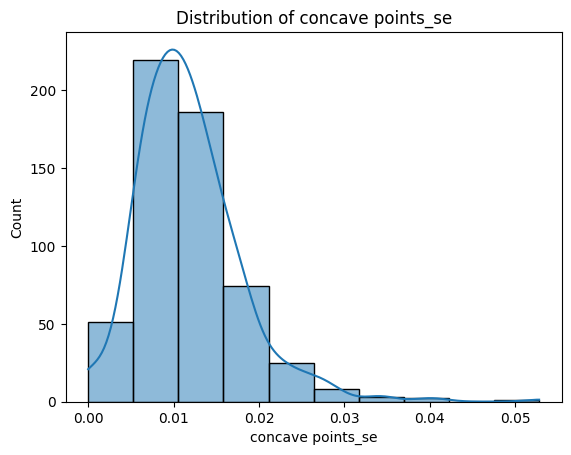

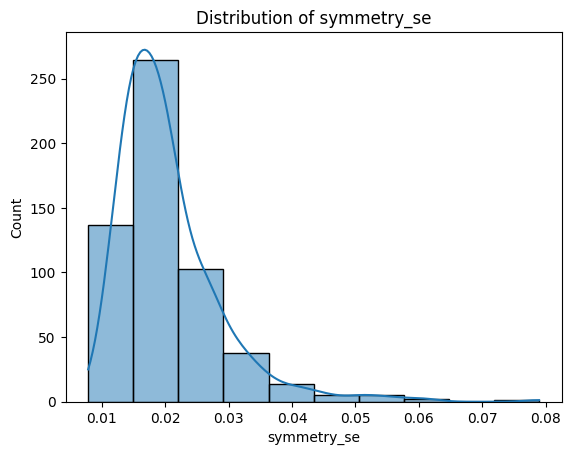

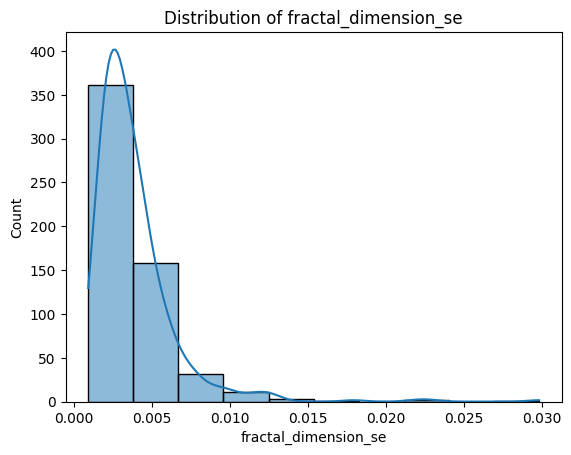

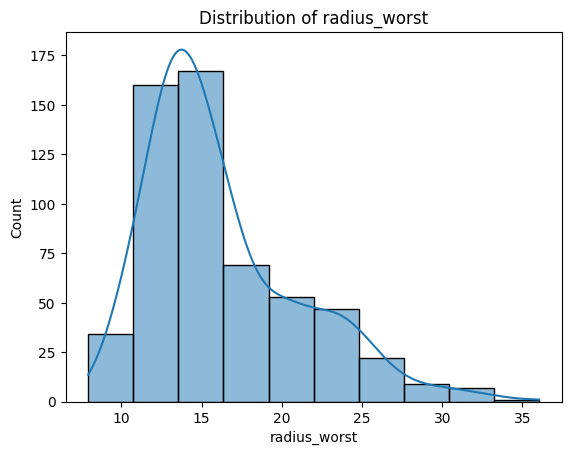

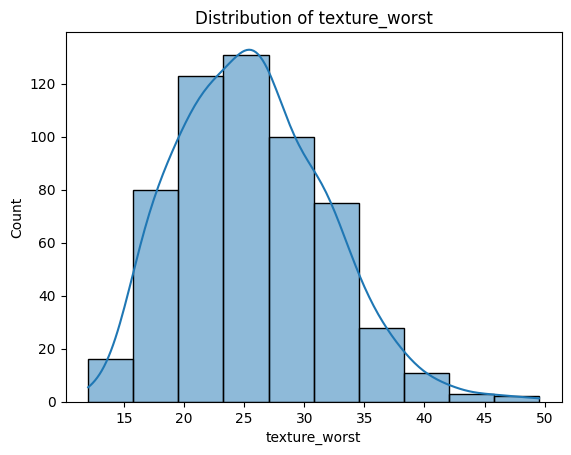

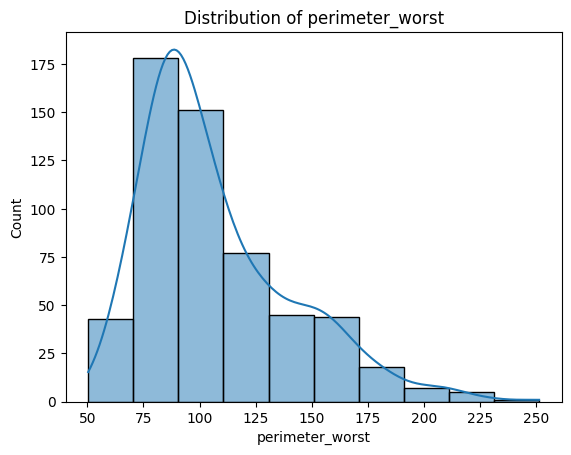

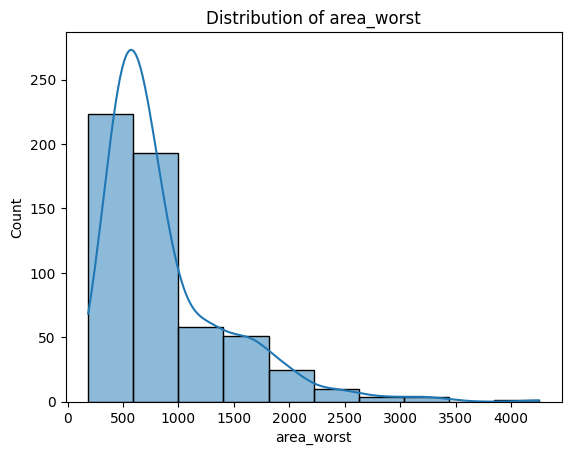

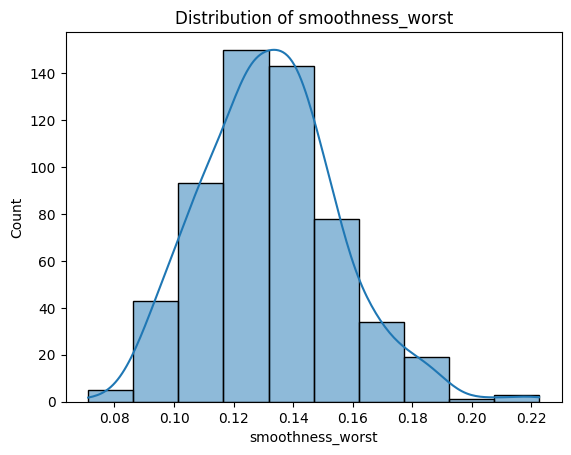

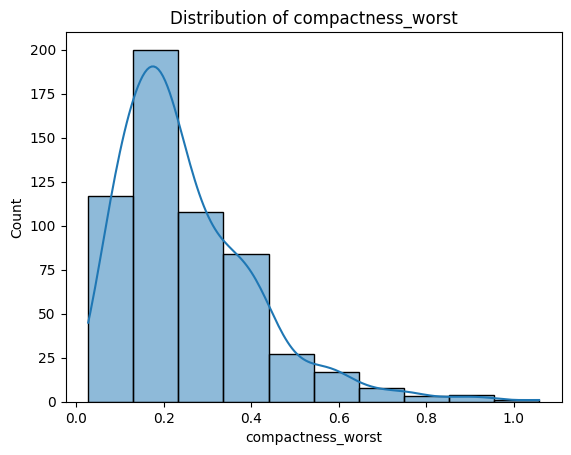

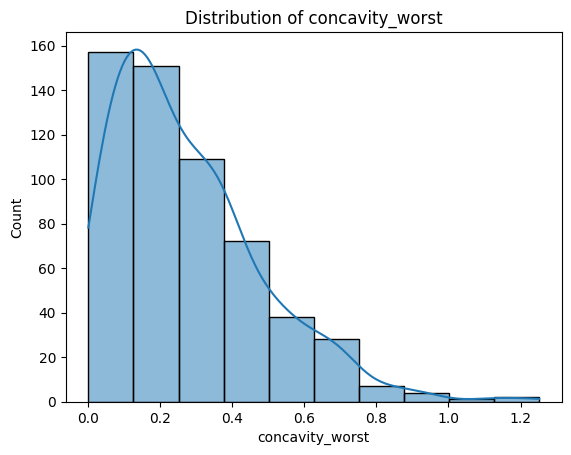

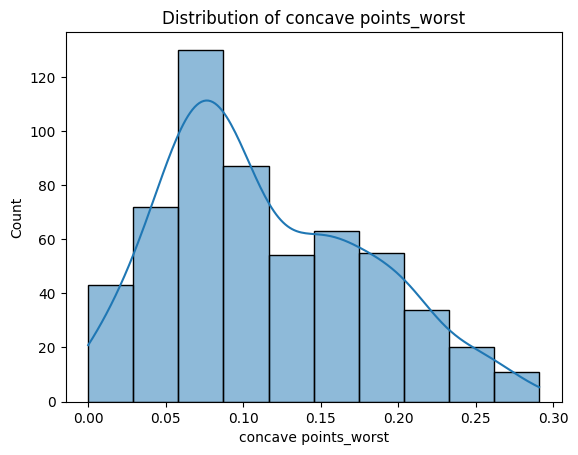

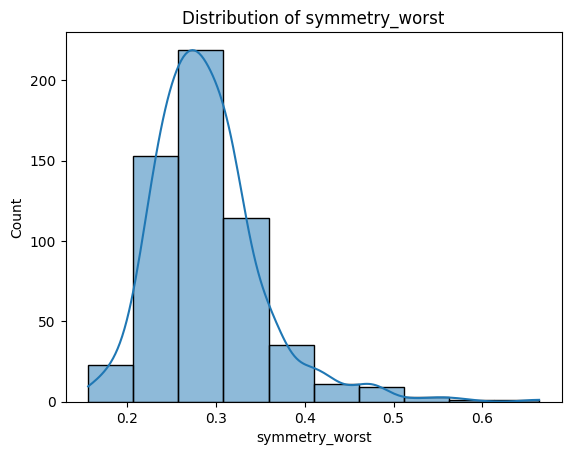

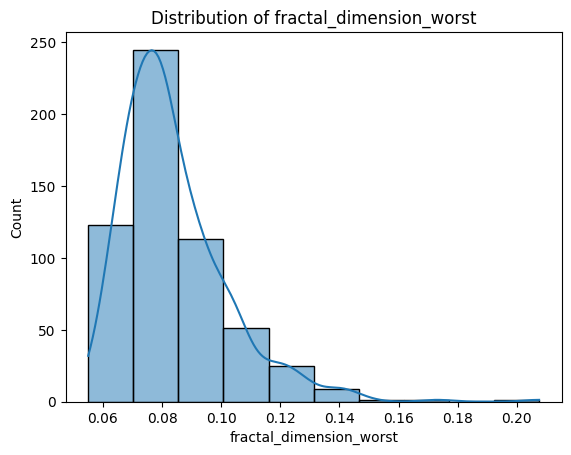

In [7]:
for i in cancer.columns:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i , data = cancer, kde = True, bins = 10)
    plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score , precision_score, f1_score, classification_report

from sklearn.model_selection import train_test_split

In [9]:
x = cancer.drop(['diagnosis'], axis = 1)
encoder = LabelEncoder()
cancer['diagnosis'] = encoder.fit_transform(cancer[['diagnosis']])
y = cancer['diagnosis']

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
xtrain , xtest, ytrain , ytest = train_test_split(x,y, test_size=0.15, random_state=4)

# Random Forest Classifier 

In [11]:
rand =RandomForestClassifier()
rand.fit(xtrain, ytrain)
ypred = rand.predict(xtest)
print("accuracy : ", rand.score(xtest, ytest))
print()
print(classification_report(ytest, ypred))

accuracy :  0.9186046511627907

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.79      0.96      0.87        24

    accuracy                           0.92        86
   macro avg       0.89      0.93      0.90        86
weighted avg       0.93      0.92      0.92        86



# Logistic Regression 

In [12]:
lr =LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("accuracy : ", lr.score(xtest, ytest))
print()
print(classification_report(ytest, ypred))

accuracy :  0.7209302325581395

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        62
           1       0.00      0.00      0.00        24

    accuracy                           0.72        86
   macro avg       0.36      0.50      0.42        86
weighted avg       0.52      0.72      0.60        86



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boost Classifier

In [13]:
gbc = GradientBoostingClassifier()

gbc.fit(xtrain, ytrain)
ypred = gbc.predict(xtest)

print("accuracy : ", gbc.score(xtest, ytest))
print()
print(classification_report(ytest, ypred))

accuracy :  0.9302325581395349

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.82      0.96      0.88        24

    accuracy                           0.93        86
   macro avg       0.90      0.94      0.92        86
weighted avg       0.94      0.93      0.93        86

